In [23]:
import pandas as pd

df = pd.read_csv("worldometer_data.csv")
df.head()



,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [8]:
print(df.dtypes , df.isnull().sum())
df=df.dropna()

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64


In [20]:
df.describe()





,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000
mean,6.400945e+07,187877.333333,2630.666667,18095.000000,300.000000,116588.000000,1706.000000,53194.333333,1358.666667,3754.000000,231.000000,9.513833e+05,18455.333333
std,5.971625e+07,240694.926462,3486.459713,28122.751003,451.199512,166645.575774,2154.779803,51367.740279,2276.357690,3558.511065,200.561711,7.208516e+05,11882.003465
min,1.168846e+07,14519.000000,20.000000,303.000000,1.000000,13543.000000,42.000000,673.000000,18.000000,283.000000,6.000000,1.835830e+05,8189.000000
25%,3.148110e+07,50471.000000,651.000000,1884.000000,40.500000,20458.000000,489.000000,28129.000000,44.500000,1934.000000,151.000000,6.202490e+05,11947.500000
50%,5.127373e+07,86423.000000,1282.000000,3465.000000,80.000000,27373.000000,936.000000,55585.000000,71.000000,3585.000000,296.000000,1.056915e+06,15706.000000
75%,9.016995e+07,274556.500000,3936.000000,26991.000000,449.500000,168110.500000,2538.000000,79455.000000,2029.000000,5489.500000,343.500000,1.335284e+06,23588.500000
max,1.290662e+08,462690.000000,6590.000000,50517.000000,819.000000,308848.000000,4140.000000,103325.000000,3987.000000,7394.000000,391.000000,1.613652e+06,31471.000000


In [21]:
df.median(numeric_only=True)
df.groupby('Continent')['TotalCases'].mean()

Continent
Asia              14519.0
North America    462690.0
South America     86423.0
Name: TotalCases, dtype: float64

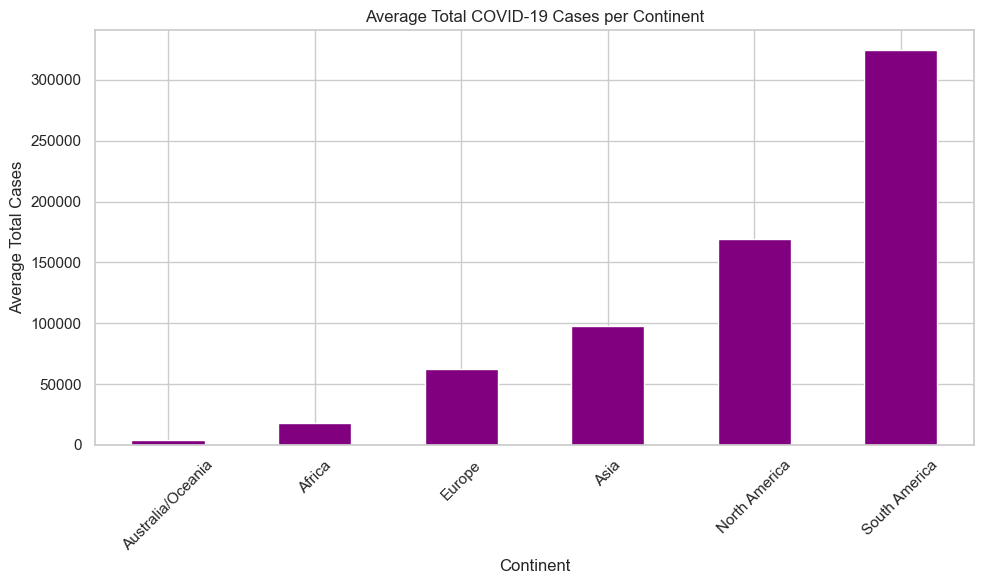

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('worldometer_data.csv')


avg_cases = df.groupby('Continent')['TotalCases'].mean().sort_values()


plt.figure(figsize=(10,6))
avg_cases.plot(kind='bar', color='purple')
plt.title('Average Total COVID-19 Cases per Continent')
plt.xlabel('Continent')
plt.ylabel('Average Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


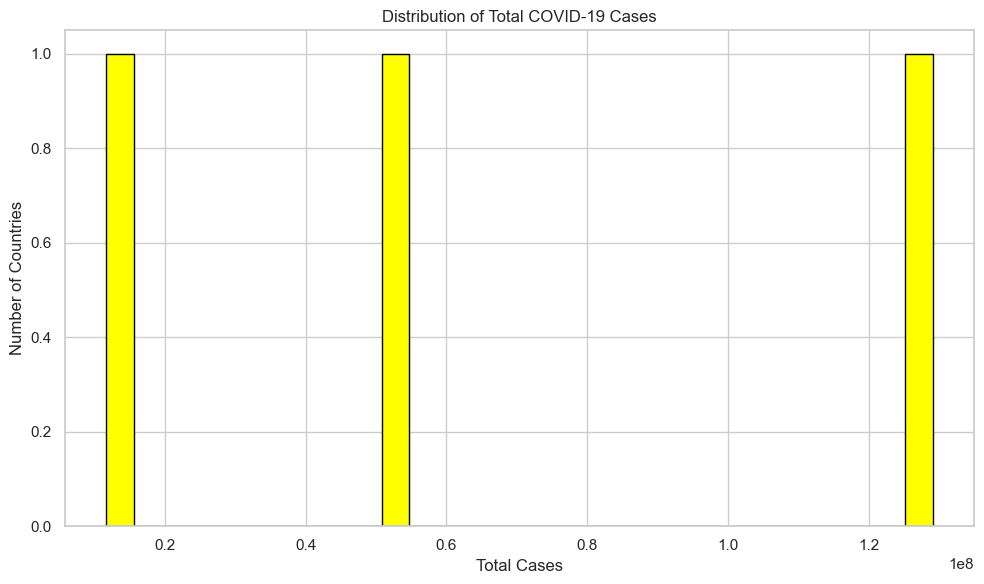

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Population'].dropna(), bins=30, color='yellow', edgecolor='black', log=True)
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


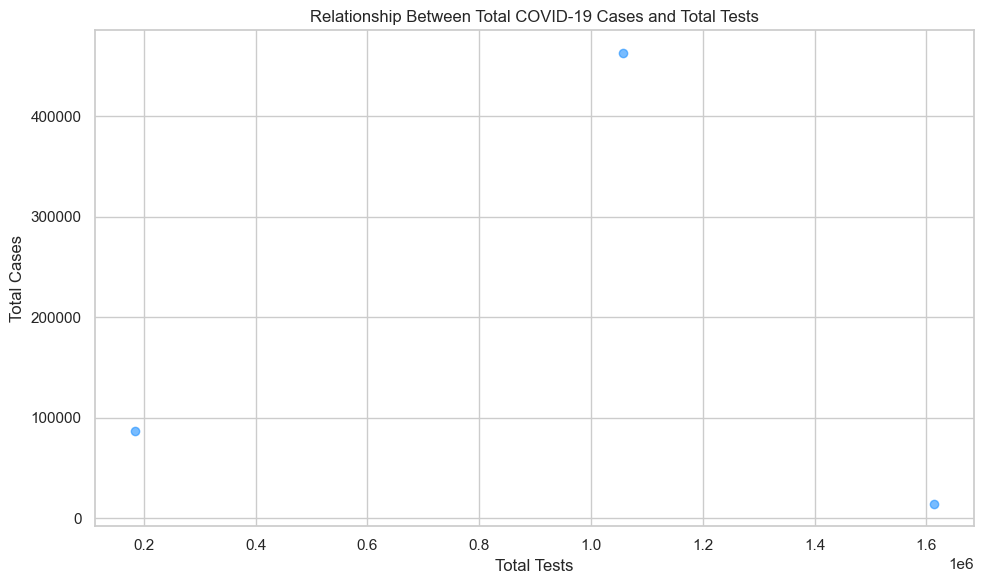

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['TotalTests'], df['TotalCases'], color='dodgerblue', alpha=0.6)

# Limit the axes to focus on a certain range
plt.xlim(0, 50000000)  # Limit x-axis to, say, 50 million tests
plt.ylim(0, 50000000)  # Limit y-axis to 50 million cases
plt.title('Relationship Between Total COVID-19 Cases and Total Tests')
plt.xlabel('Total Tests')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


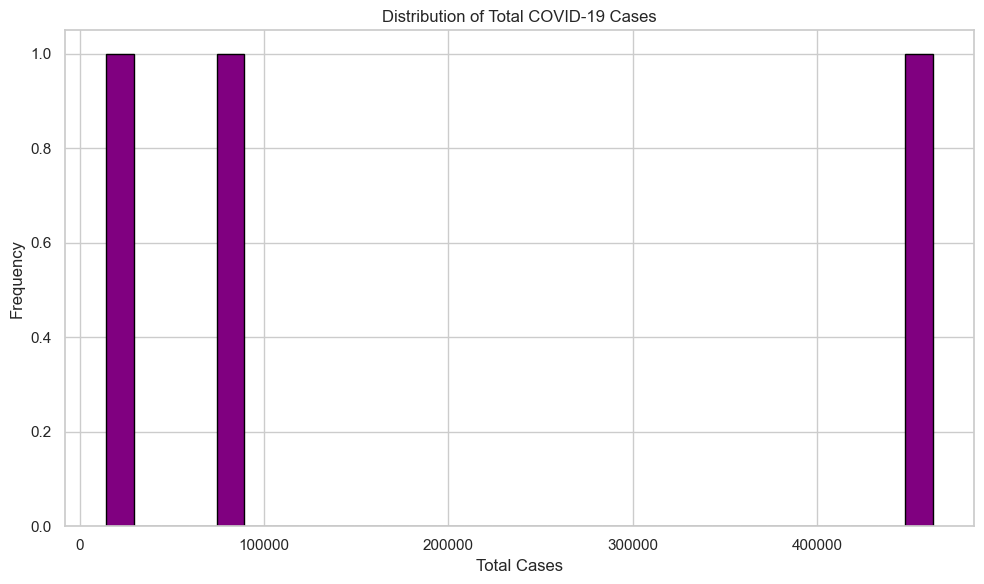

In [24]:
df['TotalCases'].dropna().plot(kind='hist', bins=30, color='purple', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


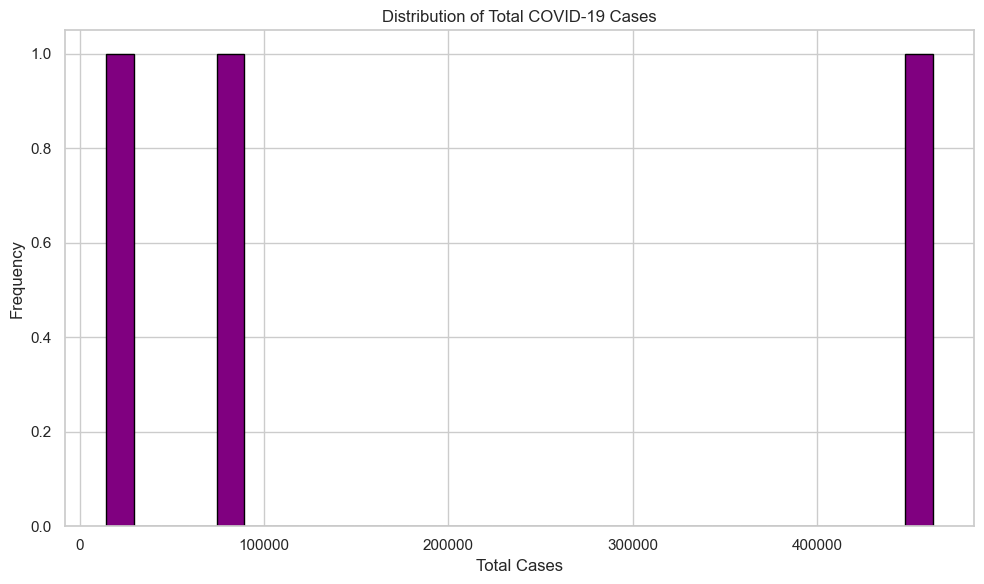

In [27]:
# Remove commas and convert to numeric
df['TotalCases'] = pd.to_numeric(df['TotalCases'].astype(str).str.replace(',', ''), errors='coerce')

# Drop NaNs again now that it's clean
df['TotalCases'].dropna().plot(kind='hist', bins=30, color='purple', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


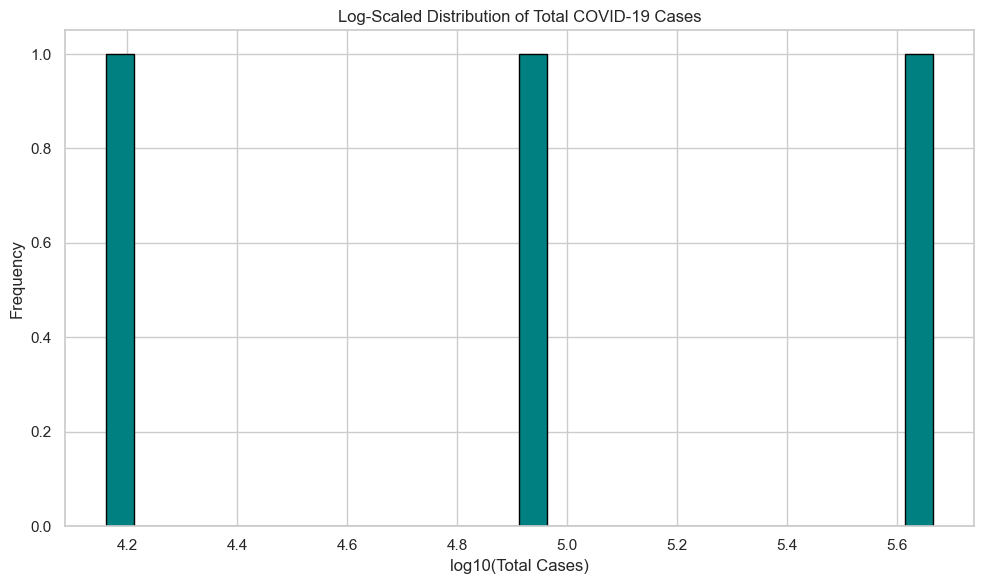

In [28]:
import numpy as np

# Use log scale to shrink massive outliers
df['TotalCases_log'] = np.log10(df['TotalCases'].replace(0, 1))  # replace 0 to avoid log(0)

df['TotalCases_log'].dropna().plot(kind='hist', bins=30, color='teal', edgecolor='black', figsize=(10, 6))
plt.title('Log-Scaled Distribution of Total COVID-19 Cases')
plt.xlabel('log10(Total Cases)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


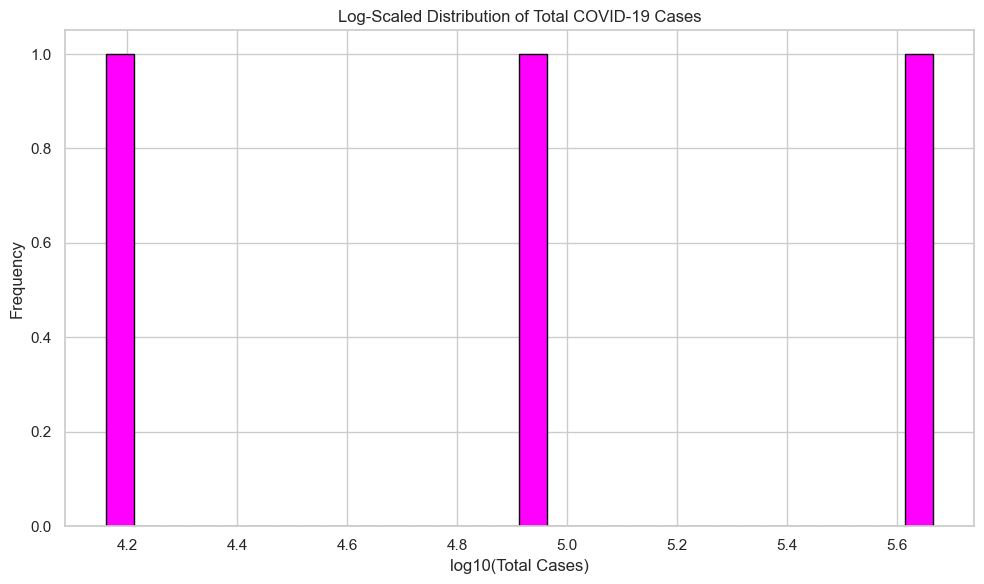

In [29]:
import numpy as np

# Step 1: Clean the numbers
df['TotalCases'] = pd.to_numeric(df['TotalCases'].astype(str).str.replace(',', ''), errors='coerce')

# Step 2: Replace 0s to avoid log(0) and transform
df['LogTotalCases'] = np.log10(df['TotalCases'].replace(0, 1))

# Step 3: Plot it!
df['LogTotalCases'].dropna().plot(kind='hist', bins=30, color='magenta', edgecolor='black', figsize=(10, 6))
plt.title('Log-Scaled Distribution of Total COVID-19 Cases')
plt.xlabel('log10(Total Cases)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [30]:
print(df['TotalCases'].describe())
print(df['TotalCases'].sort_values(ascending=False).head(10))


count         3.000000
mean     187877.333333
std      240694.926462
min       14519.000000
25%       50471.000000
50%       86423.000000
75%      274556.500000
max      462690.000000
Name: TotalCases, dtype: float64
5     462690
28     86423
72     14519
Name: TotalCases, dtype: int64


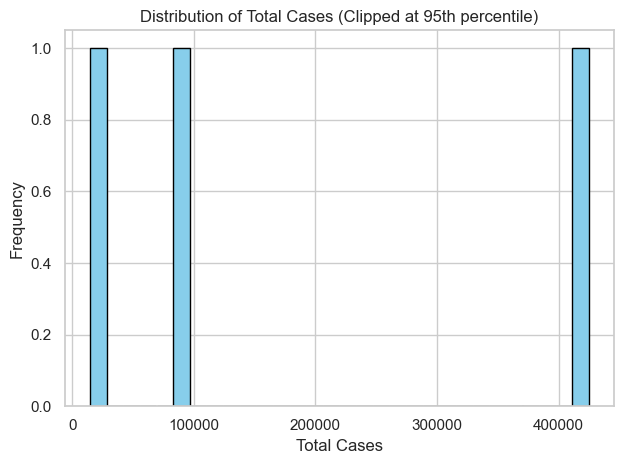

In [31]:
# Clip to remove extreme outliers
df['ClippedCases'] = df['TotalCases'].clip(upper=df['TotalCases'].quantile(0.95))

df['ClippedCases'].dropna().plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Cases (Clipped at 95th percentile)')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
